## Basic Operations

1. Assure that the data have correctly loaded. 
2. See what kind of data. 
3. Check the validity of data.

In [1]:
# Import required libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Apply the default theme
sns.set_theme()

# Load an example dataset
tips_raw = sns.load_dataset("tips")

In [2]:
# Make a copy of data 
df = tips_raw.copy()

In [3]:
# The info method gives the column datatypes + number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
# Check the number of rows and columns
df.shape

(244, 7)

In [67]:
# Check the column data types
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
tip_pct        float64
dtype: object

In [6]:
# View the first 5 rows 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# View the last 5 rows 
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [16]:
# View full data
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
# Check missing values
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
# Summary statistics
df.describe() # only for numerical variables 
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [9]:
# Correlation matrix
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# Visualization

In [20]:
# Check the average tip
df.groupby(['smoker', 'sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


### Dinner is about 60% busier compared to 40% lunch

Dinner    176
Lunch      68
Name: time, dtype: int64


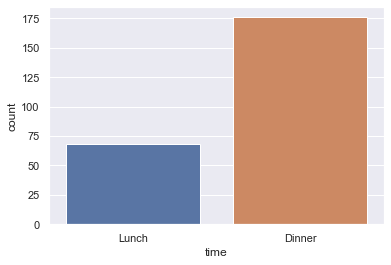

In [31]:
# Check the value counts for lunch and dinner columns
sns.countplot(x = df['time'])

print(df.time.value_counts())

### Man paid mostly. 64% of bills were paid by man compared to 36% paid by woman.

Male      157
Female     87
Name: sex, dtype: int64


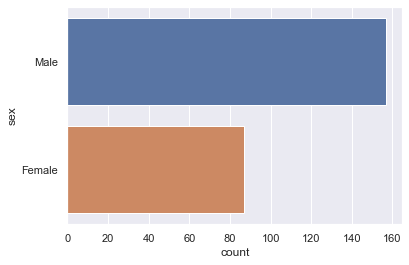

In [33]:
# Check the value counts for male and female
sns.countplot(y='sex', data=df)

print(df.sex.value_counts())

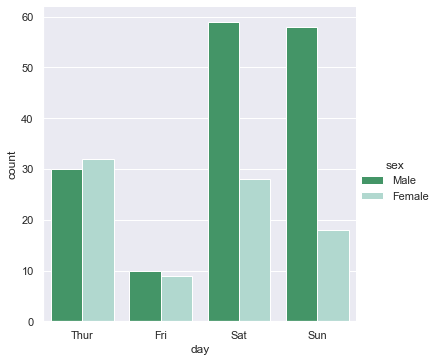

In [39]:
# Check the value counts for male and female by day
sns.catplot(data=df,
            x='day', hue='sex', 
            palette='BuGn_r', kind='count'
)

In [34]:
# Create a new column to find out the % of tip compare to total bill
df['tip_pct'] = df.tip / df.total_bill

In [35]:
# Check the values of newly created column
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

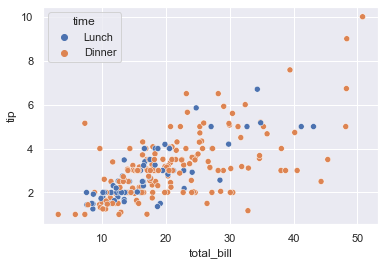

In [54]:
# Visualize the relationship between total bill and tip columns
sns.scatterplot(x ='total_bill', y ='tip', data = df, hue= 'time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

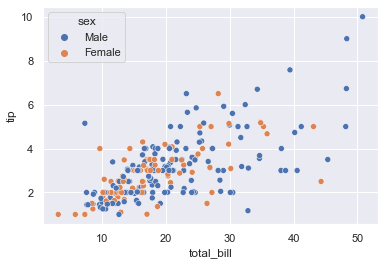

In [53]:
# Visualize the relationship between total bill and sex columns
sns.scatterplot(x ='total_bill', y ='tip', data = df, hue= 'sex')

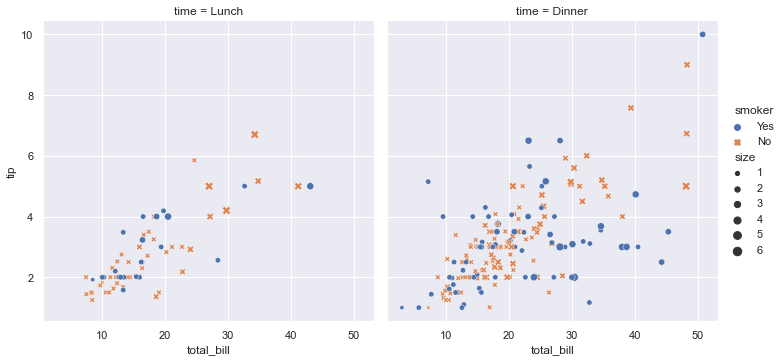

In [59]:
# Visualize the relationship between total bill and time columns
sns.relplot(
    data=df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

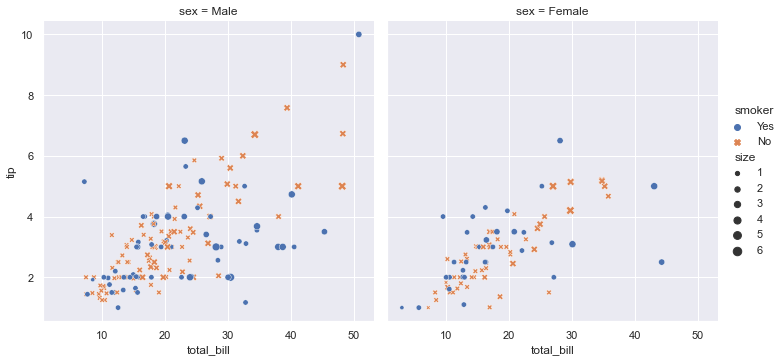

In [60]:
# Visualize the relationship between total bill and sex columns
sns.relplot(
    data=df,
    x="total_bill", y="tip", col="sex",
    hue="smoker", style="smoker", size="size",
)

### People clearly pay more total bill during dinner

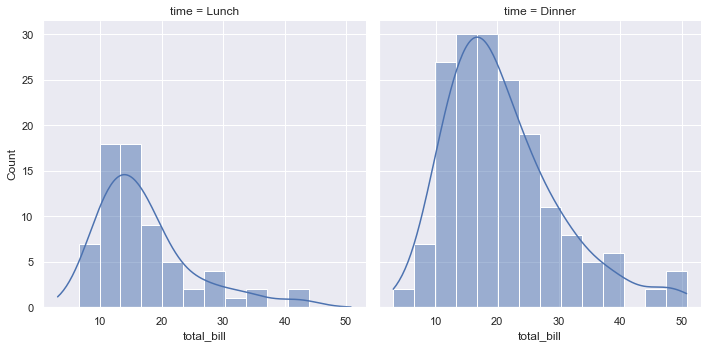

In [62]:
# Check the distribution of total bill by time
sns.displot(
    data=df,
    x='total_bill', col='time', kde=True,
)

### When total bill is higher, tip is also higher. Similarly, tip correlates with total bill. The new column total_pct doesn't tell us anything as there is no pattern.

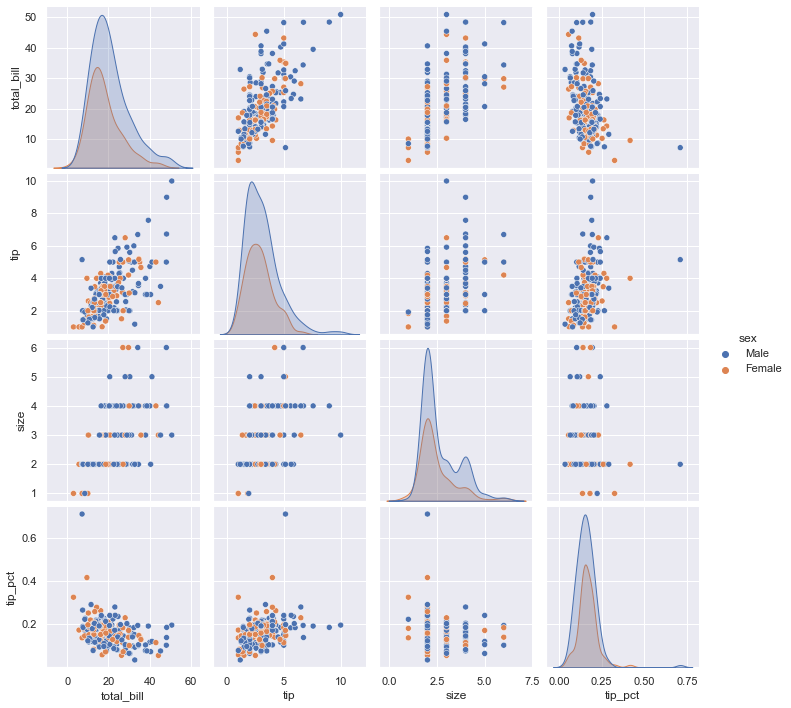

In [66]:
# Creating correlation and distribution for all the numberic variables by sex
sns.pairplot(data=df, hue='sex')